In [7]:
from plotnine import *
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
csv = pd.read_csv('PM-pool.stat', header=None)

In [3]:
csv.columns = ['id','reads','r1','r2','total','cov','min','num','max','N50','LN50','N90','NL90']
csv['lib'] = ['X'] * 96 + ['Y'] * 96 


In [4]:
csv[:3]

,id,reads,r1,r2,total,cov,min,num,max,N50,LN50,N90,NL90,lib
0,X01,"1,793,860","256,482,300","250,718,287","507,200,587",40,14.0,11074,105206,212,22153,2372,372,X
1,X02,"2,296,911","328,199,789","321,690,127","649,889,916",51,522.0,10899,200505,204,22465,2219,368,X
2,X03,"2,655,766","379,206,002","372,435,398","751,641,400",59,NaN,14484,167059,208,21533,4175,268,X


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotnine/layer.py:360: UserWarning: stat_ydensity : Removed 3 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 3 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotnine/layer.py:360: UserWarning: stat_summary : Removed 3 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


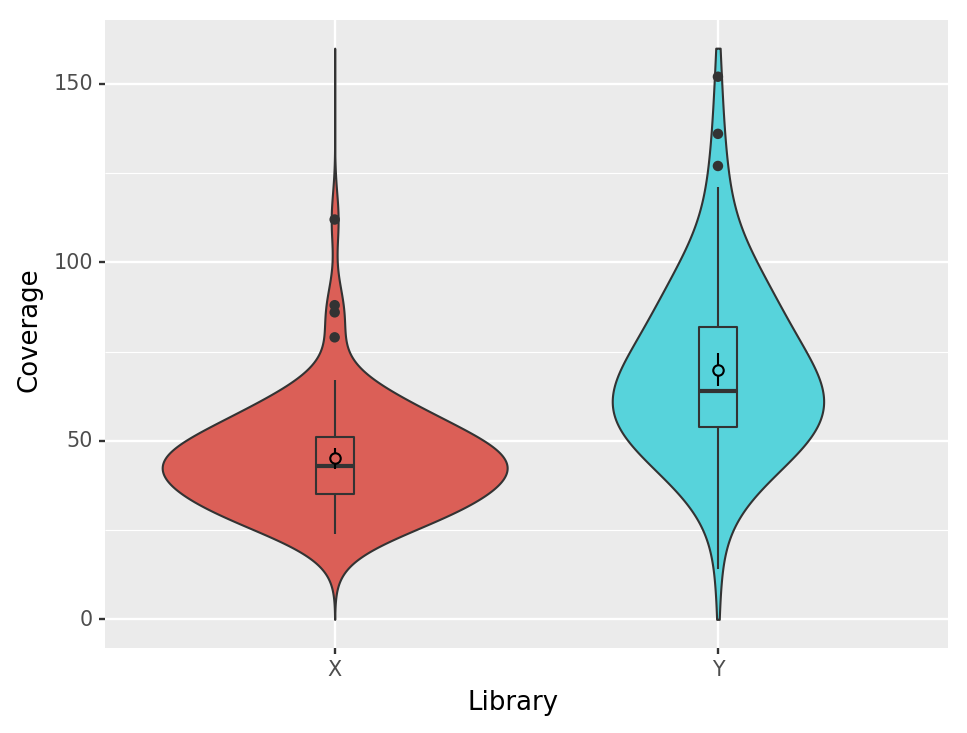

<ggplot: (310009713)>

In [51]:
cov = (ggplot(csv, aes(x='lib',y='cov', fill='lib')) 
       + geom_violin(adjust=1.5, show_legend=False, trim=False)  
       + geom_boxplot(width=0.1, show_legend=False)
       + stat_summary(fun_data='mean_cl_normal',show_legend=False)
       + ylim(0,160)
       + xlab('Library') + ylab('Coverage')
       + theme(dpi=170)
      )
cov

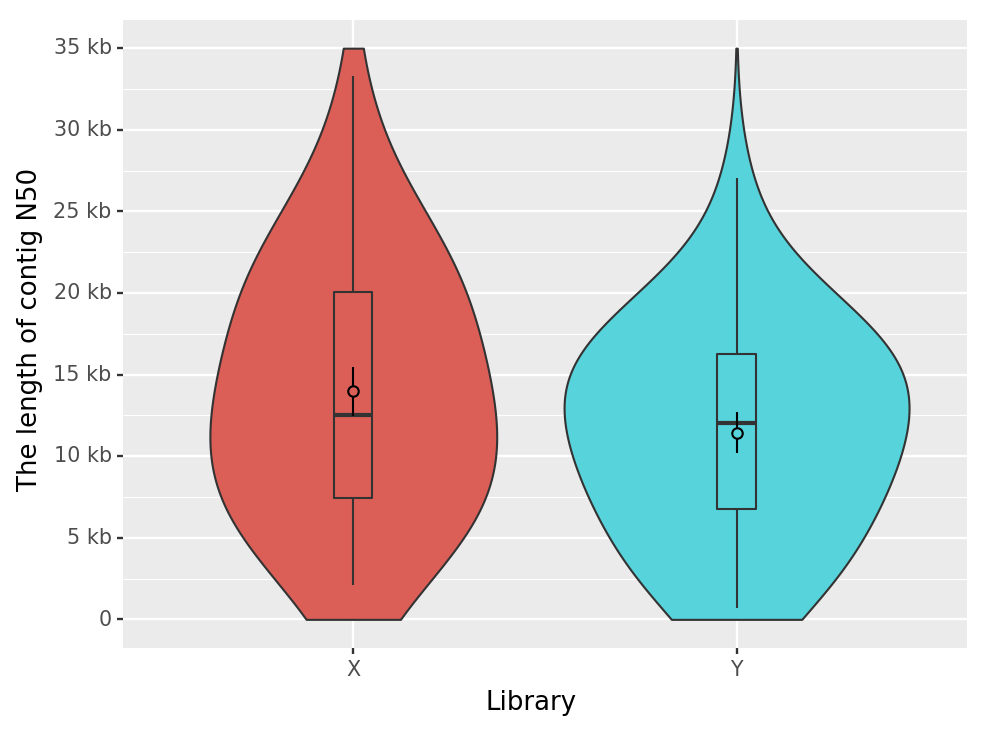

<ggplot: (-9223372036544762140)>

In [48]:
contigs = (ggplot(csv, aes(x='lib',y='LN50', fill='lib')) 
           + geom_violin(adjust=1.5, show_legend=False, trim=False) 
           + geom_boxplot(width=0.1, show_legend=False)
           + stat_summary(fun_data='mean_cl_normal',show_legend=False) 
           + scale_y_continuous(breaks=[0,5000,10000,15000,20000,25000,30000,35000], 
                                labels=['0','5 kb', '10 kb', '15 kb', '20 kb', '25 kb','30 kb','35 kb'],
                                limits=(0, 35000))
           + xlab('Library') + ylab('The length of contig N50')
           + theme(dpi=170))

contigs